# Procurement Strategy for Kraljic Matrix : 

### This project analyzes a synthetic procurement dataset using the Kraljic Matrix framework to classify items based on supply risk and profit impact. The goal is to assist strategic decision-making by:

### * Segmenting products into Kraljic quadrants

### * Identifying high-risk and high-impact items

### * Analyzing environmental and geopolitical factors

### * Building a predictive model to auto-classify new items

# EDA : 

#### Import Libraries : 

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("realistic_kraljic_dataset.csv")

In [8]:
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [164]:
df.describe()

,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.508000,4753.182000,169.390440,2.988000,3.024000,2.778000
std,23.630454,5625.105273,132.104809,1.537602,1.542661,1.392356
min,7.000000,50.000000,10.090000,1.000000,1.000000,1.000000
25%,27.000000,363.000000,50.460000,1.000000,2.000000,2.000000
50%,48.000000,1105.500000,130.640000,3.000000,3.000000,2.500000
75%,67.000000,8111.750000,255.165000,4.250000,5.000000,4.000000
max,89.000000,19940.000000,499.320000,5.000000,5.000000,5.000000


In [166]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [168]:
print(" Duplicate records : " ,df.duplicated().sum())

 Duplicate records :  0


In [170]:
df.isna().sum()

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64

### Supplier Region : 

In [173]:
df.Supplier_Region

0      South America
1      South America
2               Asia
3      South America
4               Asia
           ...      
995           Global
996           Global
997           Global
998           Global
999           Global
Name: Supplier_Region, Length: 1000, dtype: object

In [175]:
unique_Supplier_Region = df['Supplier_Region'].unique()
print(unique_Supplier_Region)

['South America' 'Asia' 'Africa' 'Europe' 'North America' 'Global']


In [178]:
supplier_region_counts = df['Supplier_Region'].value_counts()
print(supplier_region_counts)

Supplier_Region
Asia             269
Global           250
Europe           226
North America     96
Africa            83
South America     76
Name: count, dtype: int64


## Bar Plot : 

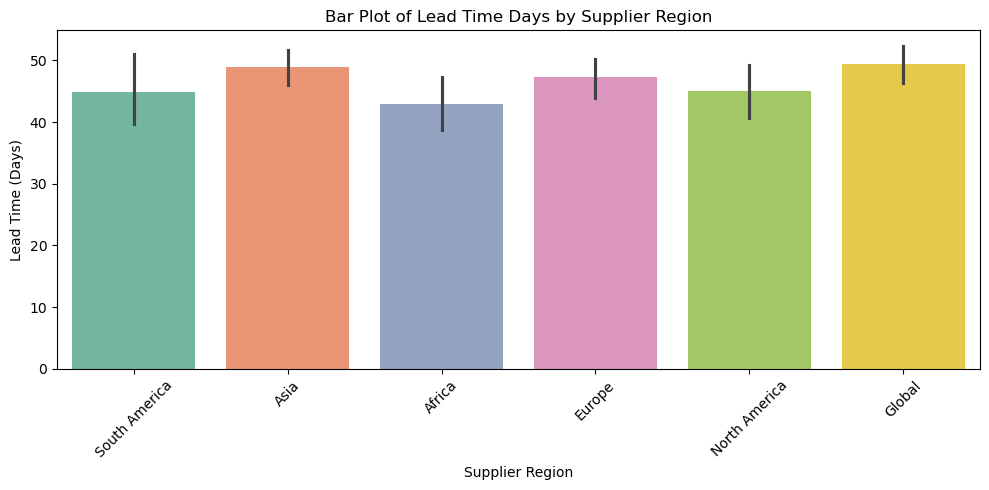

In [181]:
### Bar Plot: Lead Time Days across Supplier Regions
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')
plt.title('Bar Plot of Lead Time Days by Supplier Region')
plt.xlabel('Supplier Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Lead_Time_Days,	Order_Volume_Units,	Cost_per_Unit, Supply_Risk_Score, Profit_Impact_Score, Environmental_Impact : 

## Histogram : 

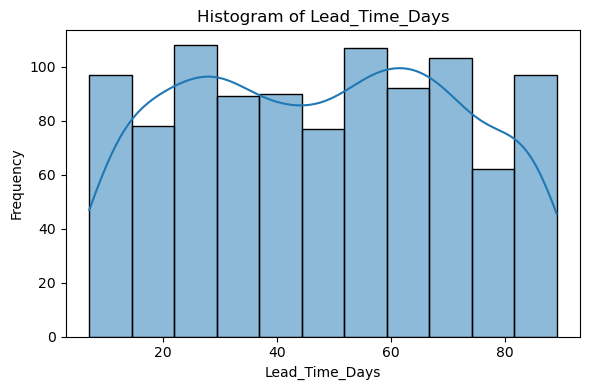

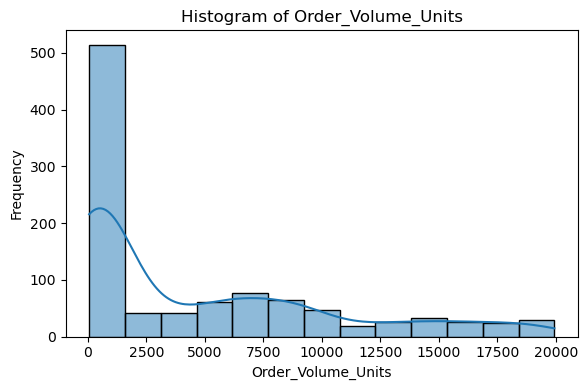

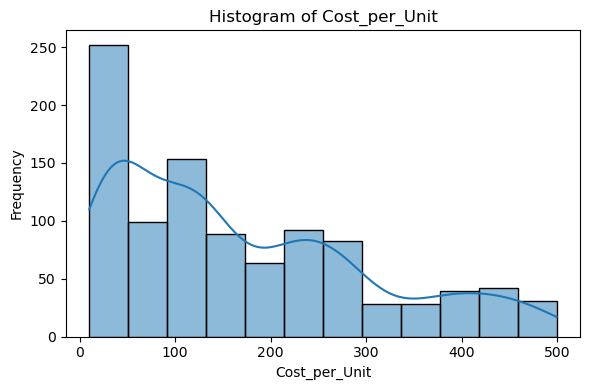

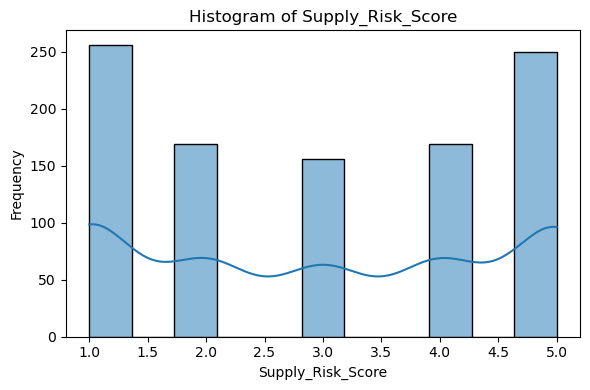

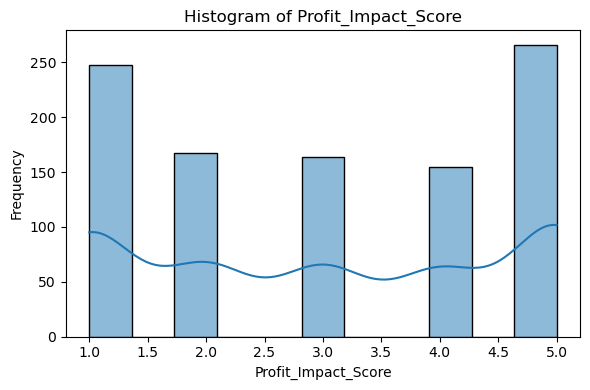

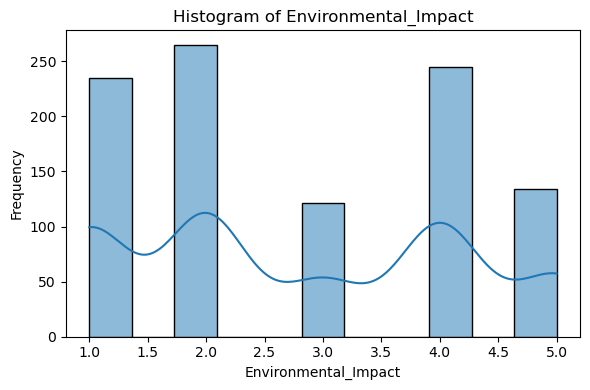

In [223]:
### Histograms of Numeric Features
numeric_df = df.select_dtypes(include=[np.number])
numeric_features = numeric_df.columns

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Pair Plot : 

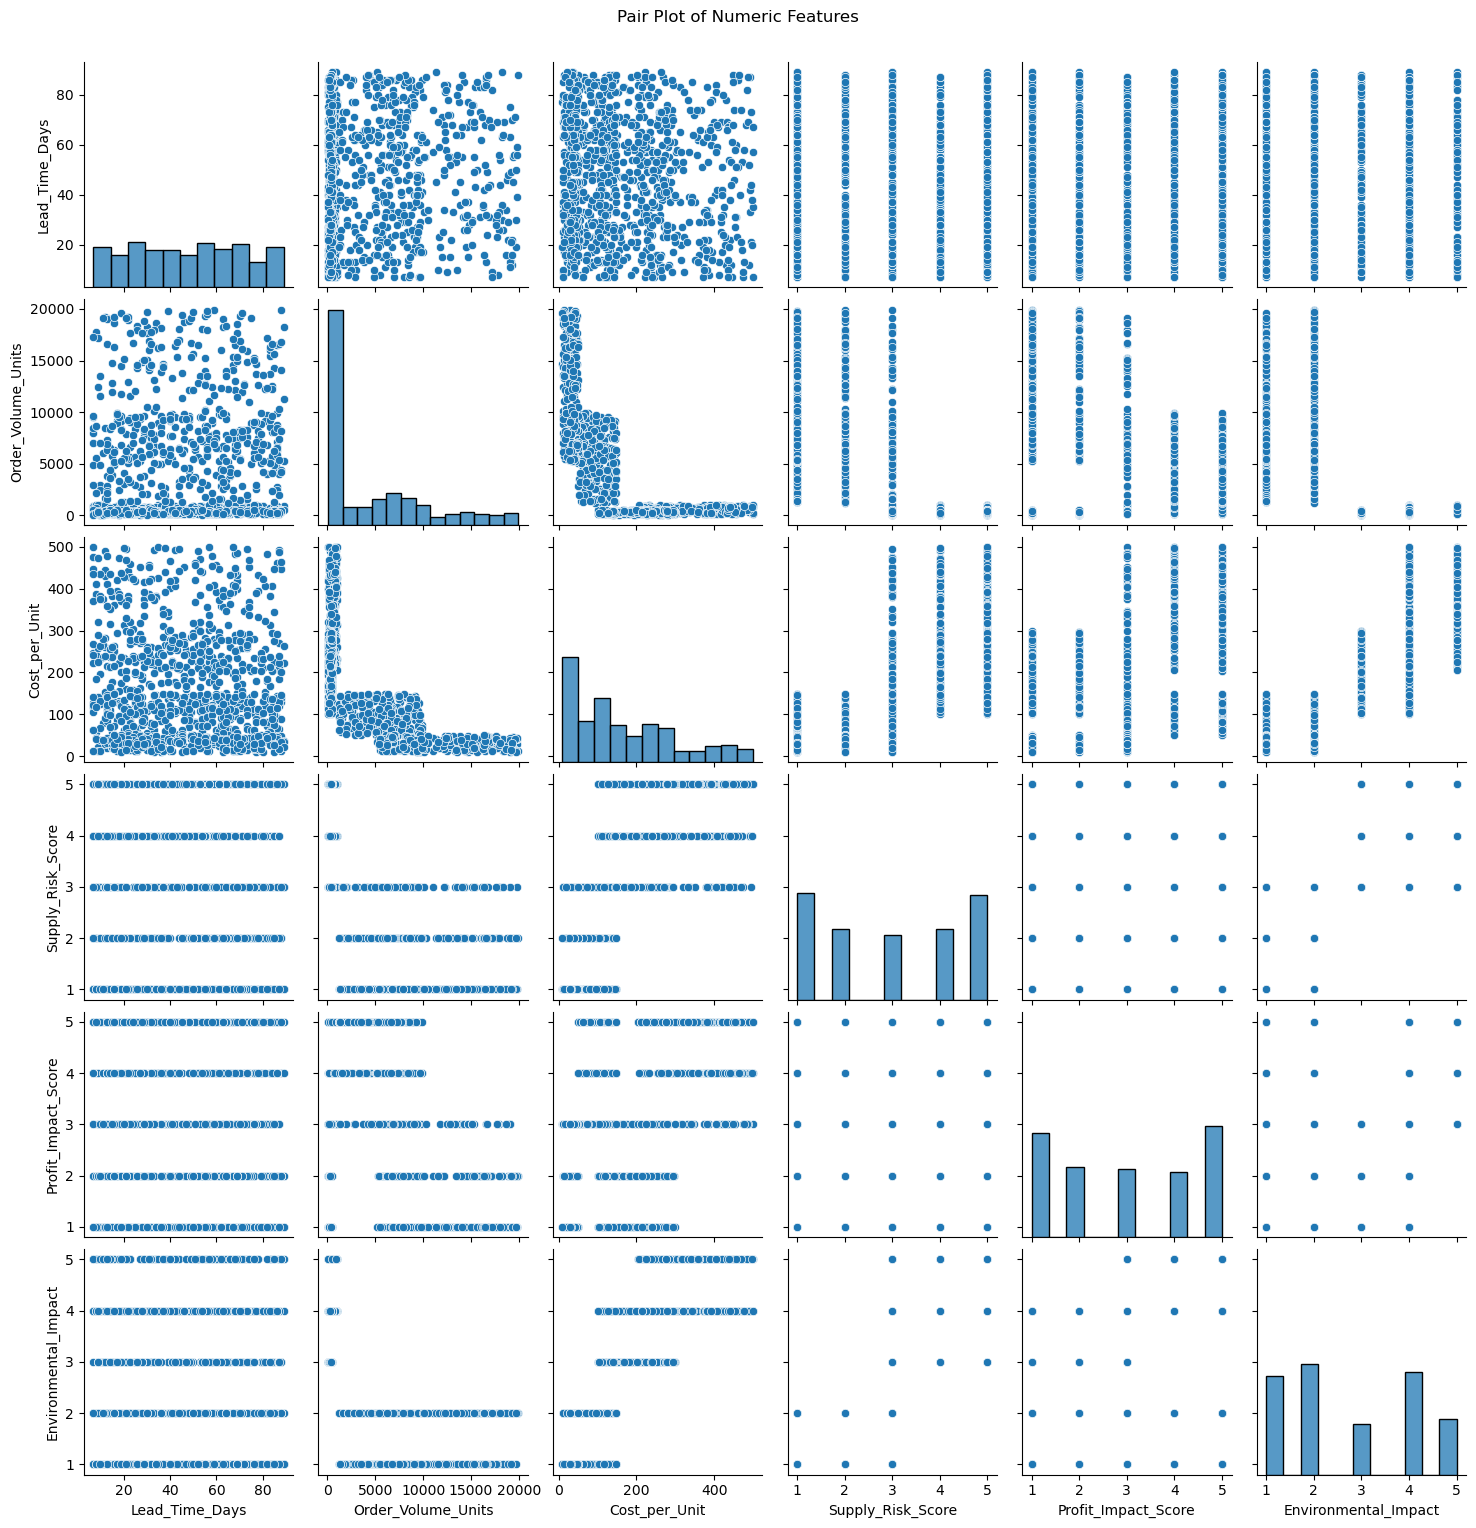

In [228]:
### Pair Plot of Numeric Features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

### Kraljic Category : 

In [231]:
unique_Kraljic_Category = df['Kraljic_Category'].unique()
print(unique_Kraljic_Category)

['Strategic' 'Bottleneck' 'Leverage' 'Non-Critical']


In [232]:
Kraljic_Category_counts = df['Kraljic_Category'].value_counts()
print(Kraljic_Category_counts)

Kraljic_Category
Strategic       250
Bottleneck      250
Leverage        250
Non-Critical    250
Name: count, dtype: int64


## Bar Plot : 

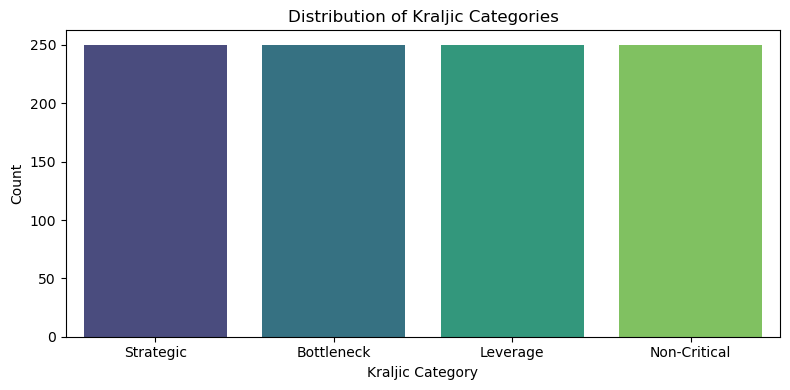

In [241]:
### Distribution of Kraljic Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Kraljic_Category', palette='viridis')
plt.title('Distribution of Kraljic Categories')
plt.xlabel('Kraljic Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Supply Risk Score : 

In [91]:
unique_Supply_Risk_Score = df['Supply_Risk_Score'].unique()
print(unique_Supply_Risk_Score)

[5 4 3 1 2]


In [93]:
Supply_Risk_Score_counts = df['Supply_Risk_Score'].value_counts()
print(Supply_Risk_Score_counts)

Supply_Risk_Score
1    256
5    250
4    169
2    169
3    156
Name: count, dtype: int64


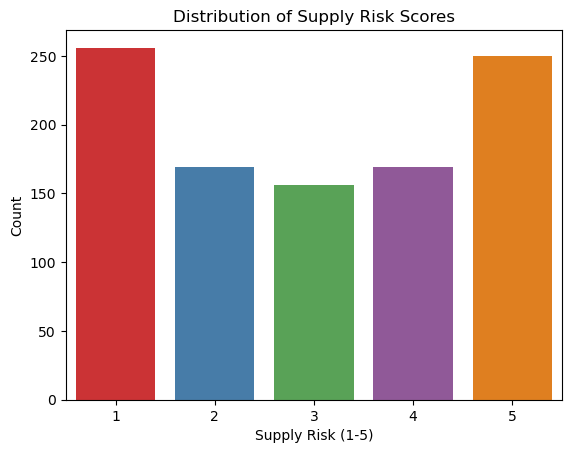

In [122]:
sns.countplot(x='Supply_Risk_Score', data=df,palette='Set1')
plt.title('Distribution of Supply Risk Scores')
plt.xlabel('Supply Risk (1-5)')
plt.ylabel('Count')
plt.show()

### Profit Impact Score :

In [106]:
Profit_Impact_Score_counts = df['Profit_Impact_Score'].value_counts()
print(Profit_Impact_Score_counts)

Profit_Impact_Score
5    266
1    248
2    167
3    164
4    155
Name: count, dtype: int64


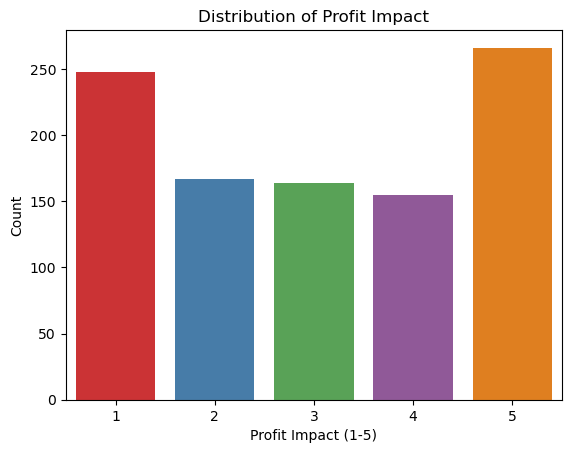

In [118]:
sns.countplot(x='Profit_Impact_Score', data=df, palette='Set1')
plt.title('Distribution of Profit Impact')
plt.xlabel('Profit Impact (1-5)')
plt.ylabel('Count')
plt.show()


## Supply Risk Score and Profit Impact Score :

## Scatter Plot : 

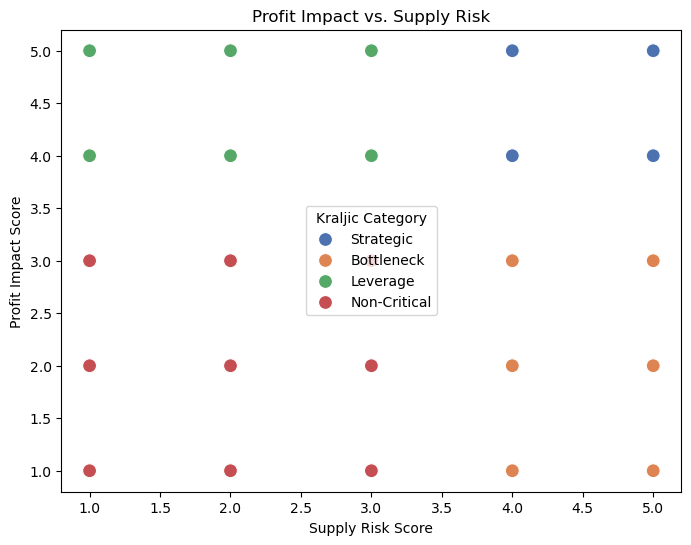

In [112]:
# 2. Profit Impact vs. Supply Risk (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Supply_Risk_Score', y='Profit_Impact_Score', data=df, hue='Kraljic_Category', palette='deep', s=100)
plt.title('Profit Impact vs. Supply Risk')
plt.xlabel('Supply Risk Score')
plt.ylabel('Profit Impact Score')
plt.legend(title='Kraljic Category')
plt.show()

## Heat Map : 

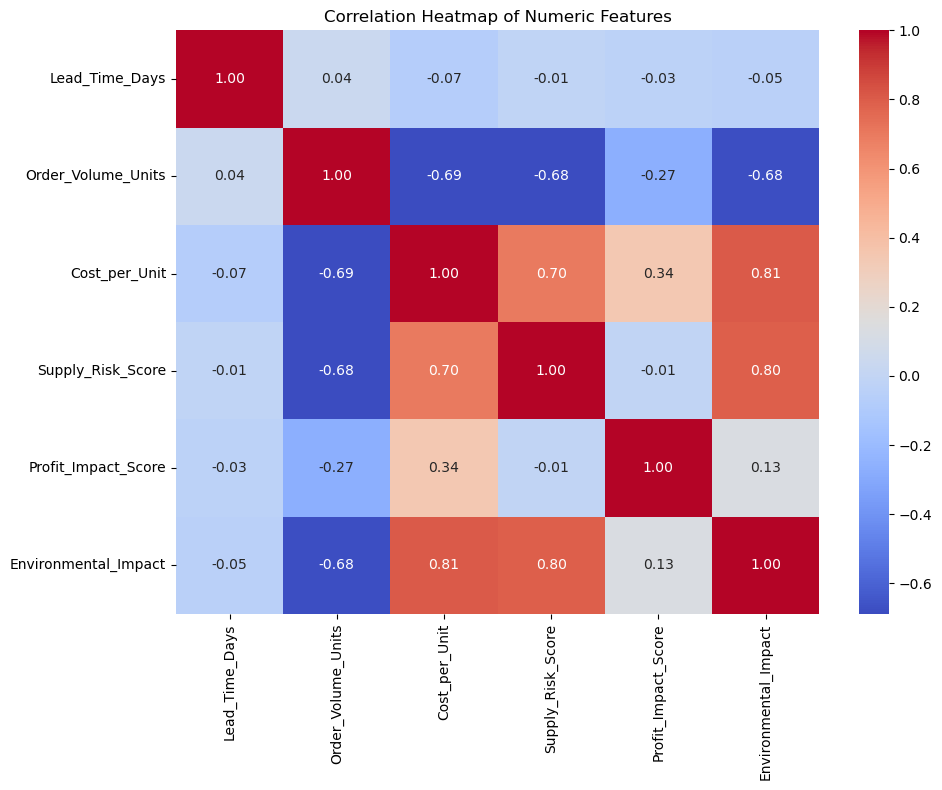

In [248]:
### Correlation Heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

In [251]:
df.groupby('Kraljic_Category')['Cost_per_Unit'].mean()

Kraljic_Category
Bottleneck      197.96508
Leverage        100.46048
Non-Critical     29.90852
Strategic       349.22768
Name: Cost_per_Unit, dtype: float64

## Bar Plot : 

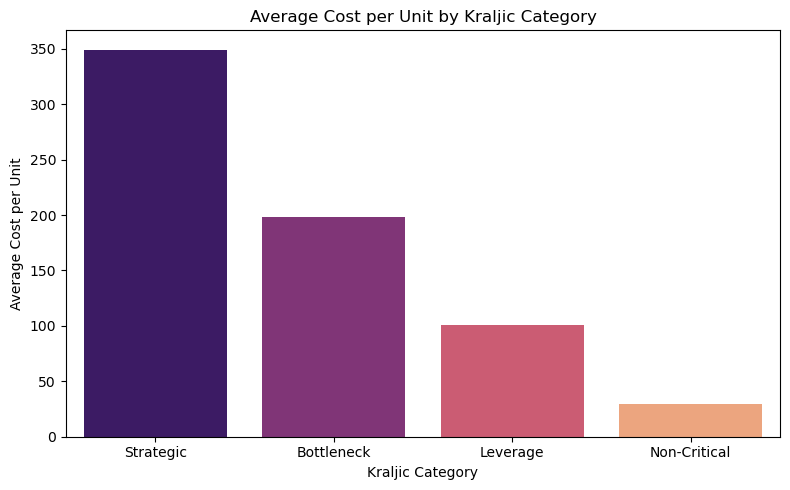

In [254]:
### Grouped Barplot: Average Cost per Unit by Kraljic Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Kraljic_Category', y='Cost_per_Unit', palette='magma', ci=None)
plt.title('Average Cost per Unit by Kraljic Category')
plt.xlabel('Kraljic Category')
plt.ylabel('Average Cost per Unit')
plt.tight_layout()
plt.show()

# Implementation : 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# K Nearest Neighbors : 

In [99]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
X

,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact
0,81,171,255.03,5,5,4
1,8,763,380.33,5,4,4
2,65,413,385.24,4,5,5
3,70,882,287.64,5,5,5
4,15,120,382.26,4,4,4
...,...,...,...,...,...,...
995,19,19648,10.20,2,1,1
996,21,19143,15.30,1,2,1
997,70,5352,30.23,1,3,2
998,44,18070,30.73,1,1,2


In [133]:
unique_Kraljic_Category = df['Kraljic_Category'].unique()
print(unique_Kraljic_Category)

['Strategic' 'Bottleneck' 'Leverage' 'Non-Critical']


In [135]:
y = df[['Kraljic_Category']]
y

,Kraljic_Category
0,Strategic
1,Strategic
2,Strategic
3,Strategic
4,Strategic
...,...
995,Non-Critical
996,Non-Critical
997,Non-Critical
998,Non-Critical


In [137]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [139]:
knn_model = KNeighborsClassifier()

In [141]:
knn_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [143]:
y_predict = knn_model.predict(X_test)

In [145]:
print (accuracy_score(y_test,y_predict))

0.855


### The KNN model was trained on the dataset and achieved an accuracy of 85%. This suggests that the model is performing [Good] in identifying the correct labels in the training data.

# Naive Bayes Algorithms : 

In [185]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [189]:
nb = GaussianNB()

In [191]:
# training ... fitting 
nb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [193]:
y_pred = nb.predict(X_test) # output predicted by the model

In [195]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Bottleneck       0.99      1.00      0.99        78
    Leverage       1.00      1.00      1.00        75
Non-Critical       1.00      1.00      1.00        75
   Strategic       1.00      0.99      0.99        72

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[78  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 1  0  0 71]]


### With an accuracy of 100%, Naive Bayes proved to be efficient for this classification task. The model's Excellent performance can be attributed to the dataset's relatively clean feature distribution and low multicollinearity. However, in domains where features are highly correlated (violating the independence assumption), this performance might drop.

# Logistic Regression : 

In [197]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
lr_model = LogisticRegression()

In [203]:
lr_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [205]:
y_pred = lr_model.predict(X_test) # output predicted by the model

In [207]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Bottleneck       0.92      0.88      0.90        52
    Leverage       0.98      0.96      0.97        55
Non-Critical       0.96      0.98      0.97        49
   Strategic       0.87      0.91      0.89        44

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200

[[46  0  0  6]
 [ 0 53  2  0]
 [ 0  1 48  0]
 [ 4  0  0 40]]


### Achieved 94% accuracy using Logistic Regression, indicating good model performance in classifying target variables with moderate precision. Further tuning or feature engineering could enhance results.

# Support Vector Machine : 

In [265]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [267]:
# train/test/split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
svm_model = SVC()

In [271]:
# fitting the model 

svm_model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [273]:
# predict 
y_pred = svm_model.predict(X_test)

In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Bottleneck       0.71      1.00      0.83        52
    Leverage       0.78      0.89      0.83        55
Non-Critical       0.95      0.71      0.81        49
   Strategic       0.85      0.52      0.65        44

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.78       200
weighted avg       0.82      0.80      0.79       200



### Achieved 80% accuracy using SVM, indicating good model performance on the given dataset. Validated results using cross-validation to ensure robustness.

# Linear Regression : 

In [297]:
X = df[['Lead_Time_Days', 'Order_Volume_Units','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Cost_per_Unit']]

In [299]:
# train/test/split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
linear_model = LinearRegression()

In [303]:
linear_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [305]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [307]:
from sklearn.metrics import r2_score
print('Training R2 Score:',np.round(r2_score(y_train,y_train_pred)))
print('Testing R2 Score:',np.round(r2_score(y_test,y_test_pred)))

Training R2 Score: 1.0
Testing R2 Score: 1.0


### The Linear Regression model show 100% accuracy (R² = 1.0), indicating that it perfectly explains the variance in the target variable. This suggests a strong linear relationship between features and target. However, further validation is needed to ensure this is not due to overfitting or data leakage.


In [322]:
# predict the Cost_per_Unit based on Lead_Time_Days, Order_Volume_Units, Supply_Risk_Score, Profit_Impact_Score, Environmental_Impact  features .
linear_model.predict([[8, 763, 5, 4, 4 ]])

array([[305.92969153]])

# Gradient Boosting : 

In [327]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [329]:
# train/test/split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
model = GradientBoostingClassifier(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Max depth of each tree
    random_state=42
)

In [337]:
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [339]:
y_pred = model.predict(X_test)

In [341]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[52  0  0  0]
 [ 0 55  0  0]
 [ 0  0 49  0]
 [ 1  0  0 43]]


### Achieved 99% accuracy using Gradient Boosting Classifier, demonstrating high model performance in distinguishing between target classes with minimal error.

# Random Forest : 

In [359]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [361]:
# train/test/split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
model = RandomForestClassifier()

In [371]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [373]:
y_pred = model.predict(X_test)

In [375]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.995
              precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



### Achieving 99% accuracy indicates that the model is correctly classifying nearly all cases. For instance, in an early-stage realistic kraljic study, the Random Forest model outperformed other techniques, reaching 99% accuracy on that dataset.

# AdaBoost Algorithms : 

In [67]:
X = df[['Lead_Time_Days', 'Order_Volume_Units',	'Cost_per_Unit','Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact' ]]
y = df[['Kraljic_Category']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
base_model = DecisionTreeClassifier(max_depth= 1) 
ada_clf = AdaBoostClassifier(estimator= base_model, n_estimators= 50, learning_rate = 1.0, random_state= 42) 

In [73]:
# train AdaBoost 
ada_clf.fit(X_train, y_train) 

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [74]:
y_pred = ada_clf.predict(X_test) 

In [75]:
print("Accuracy:" ,accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.535
              precision    recall  f1-score   support

  Bottleneck       0.54      1.00      0.70        52
    Leverage       0.53      1.00      0.69        55
Non-Critical       0.00      0.00      0.00        49
   Strategic       0.00      0.00      0.00        44

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.37       200



### "The AdaBoost algorithm achieved a 54% accuracy on the realistic Kraljic dataset, indicating limited predictive performance.It is not good for this dataset.This suggests the need for further optimization or alternative modeling approaches to enhance classification effectiveness.

# Conclusion : 

### Naive Bayes and Linear Regression both achieved 100% accuracy, suggesting good (Excellent) model fit, signaling perfect classification on this dataset—but such results warrant careful scrutiny for potential overfitting.

### Gradient Boosting and Random Forest followed closely at 99% accuracy, demonstrating exceptionally strong predictive power and reliability.

### Logistic Regression performed well with 94% accuracy, marking it as a robust yet simpler alternative.

### K-Nearest Neighbors (KNN) achieved 85% accuracy, hinting at moderate performance that may suffer in more complex patterns.

### Support Vector Machine (SVM) posted the lowest performance among classifiers at 80% accuracy, indicating possible challenges in capturing non-linear boundaries or high variance in features.

### AdaBoost lagged significantly at 54%, suggesting poor model fit, instability, or misconfiguration relative to other ensemble methods.